# Problem 2
**import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

In [2]:
pip install markup

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for markup: filename=markup-0.2-py3-none-any.whl size=5635 sha256=417c70210cdf624c81c5c2b5ed49a7b102b9b34dbdbe97604f1801e8124e7208
  Stored in directory: c:\users\barry\appdata\local\pip\cache\wheels\bf\a5\bd\2775ab5accf1542f411f9e824c1194c18549dc690cc12400f0
Successfully built markup
Note: you may need to restart the kernel to use updated packages.


**load the data**

In [3]:
df=pd.read_parquet(r"C:\Users\Barry\Desktop\projects\akaike assignment\Structured_Data_Assignment\Structured_Data_Assignment\Structuredata_assignment\train.parquet")

In [4]:
df.head()

Patient-Uid       Date           Incident
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09  PRIMARY_DIAGNOSIS
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16  PRIMARY_DIAGNOSIS
3  a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30     SYMPTOM_TYPE_0
4  a0dc950b-1c7c-11ec-b6ec-16262ee38c7f 2015-04-22        DRUG_TYPE_0
8  a0dc9543-1c7c-11ec-bb63-16262ee38c7f 2016-06-18        DRUG_TYPE_1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


# Target Drug dropoff rate analysis

In [6]:
df['Patient-Uid'].nunique()

27033

In [7]:
# Calculate the ideal treatment duration rate in months  
ideal_duration = 12
ideal_duration_months = ideal_duration * 30 / 365

In [8]:
# Filter the dataframe to only include rows where the drug is the "Target Drug"
target_drug = df[df['Incident'] == 'TARGET DRUG']

In [9]:
target_drug.shape

(67218, 3)

In [10]:
# calculate the dropoff count 
dropoff_count = target_drug.groupby(pd.Grouper(key='Date', freq='M'))['Patient-Uid'].nunique()
dropoff_count.head()

Date
2017-02-28     1
2017-03-31     2
2017-04-30     1
2017-05-31     5
2017-06-30    11
Freq: M, Name: Patient-Uid, dtype: int64

In [11]:
# Calculate the dropoff rate 
dropoff_rate = dropoff_count / ideal_duration_months

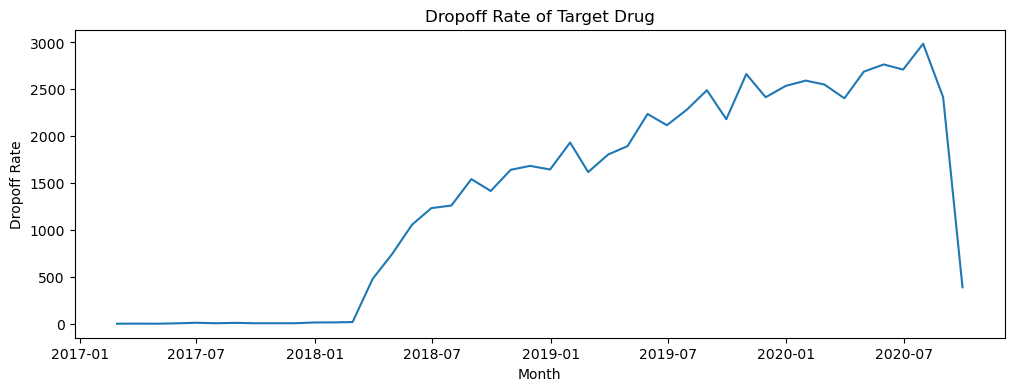

In [12]:
#Plot the dropoff rate over time:
fig = plt.figure(figsize=(12, 4))
plt.plot(dropoff_rate)
plt.xlabel('Month')
plt.ylabel('Dropoff Rate')
plt.title('Dropoff Rate of Target Drug')
plt.show()